<a href="https://colab.research.google.com/github/stuck-w-yu/Iris_dataset/blob/main/Latihan%20Pert%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAMA = WAHYU FIRMANYAH
NPM 240210016
PERTEMUAN 2
KIRIM KE kokohandoko263@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error

dataframe = pd.read_csv('Rumah.csv')

dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
print(np.shape(dataframe))

(506, 14)


In [ ]:
print(dataframe.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


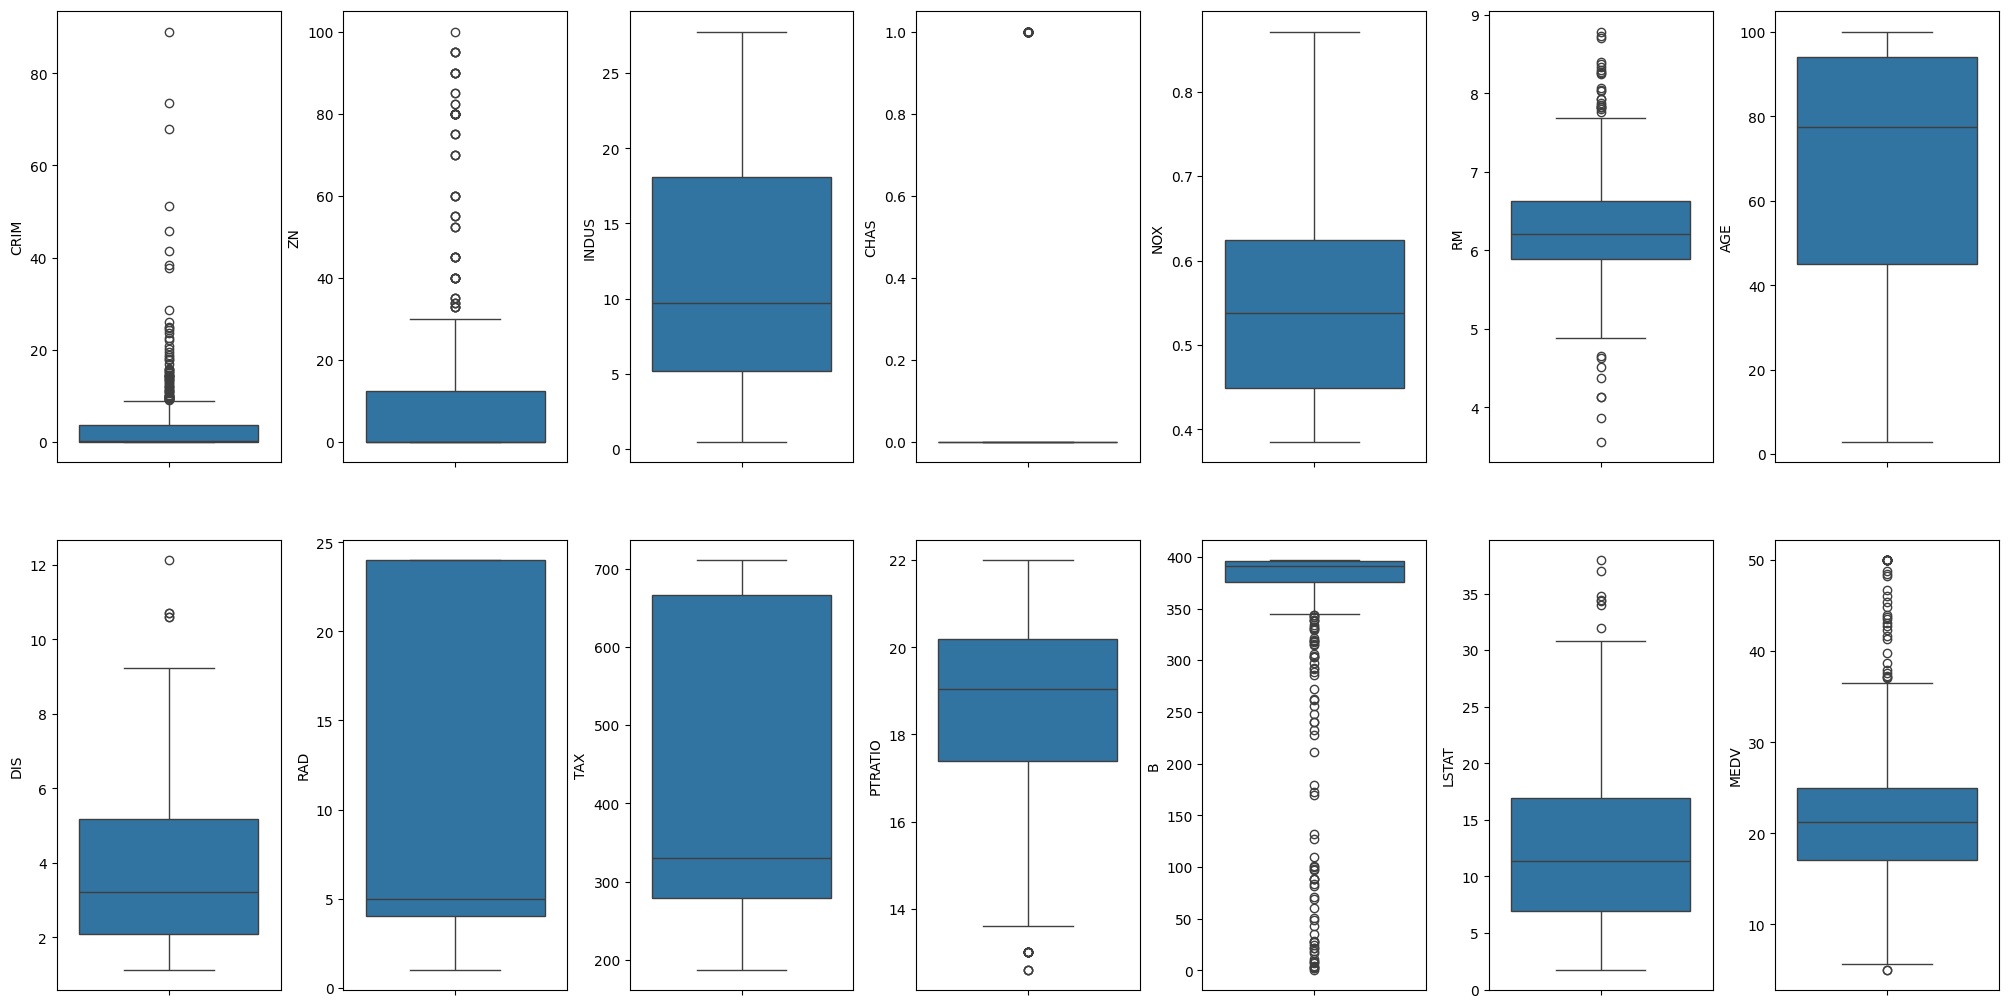

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7,nrows=2,figsize=(20, 10))
axs = axs.flatten()
index = 0
for k,v in dataframe.items():
  sns.boxplot(y=k, data=dataframe, ax=axs[index])
  index += 1
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
for k, v in dataframe.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <=  q1 - 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(dataframe)[0]
  print("column %s outliers = %.2f%%" % (k, perc))

column CRIM outliers = 0.00%
column ZN outliers = 0.00%
column INDUS outliers = 0.00%
column CHAS outliers = 93.08%
column NOX outliers = 0.00%
column RM outliers = 1.58%
column AGE outliers = 0.00%
column DIS outliers = 0.00%
column RAD outliers = 0.00%
column TAX outliers = 0.00%
column PTRATIO outliers = 2.96%
column B outliers = 15.22%
column LSTAT outliers = 0.00%
column MEDV outliers = 0.40%


<Axes: >

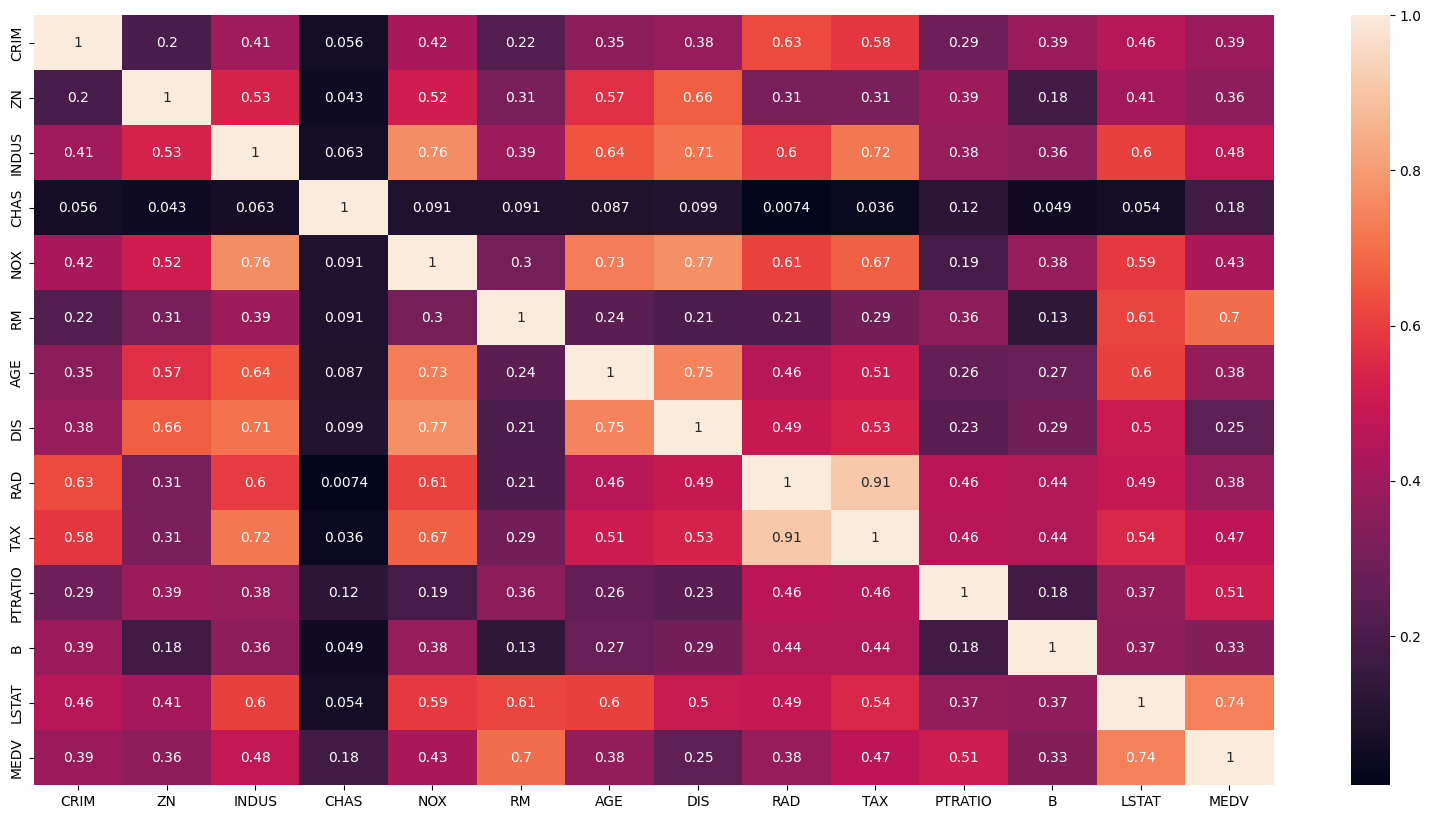

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr().abs(), annot=True)

KeyError: 'MEDV'

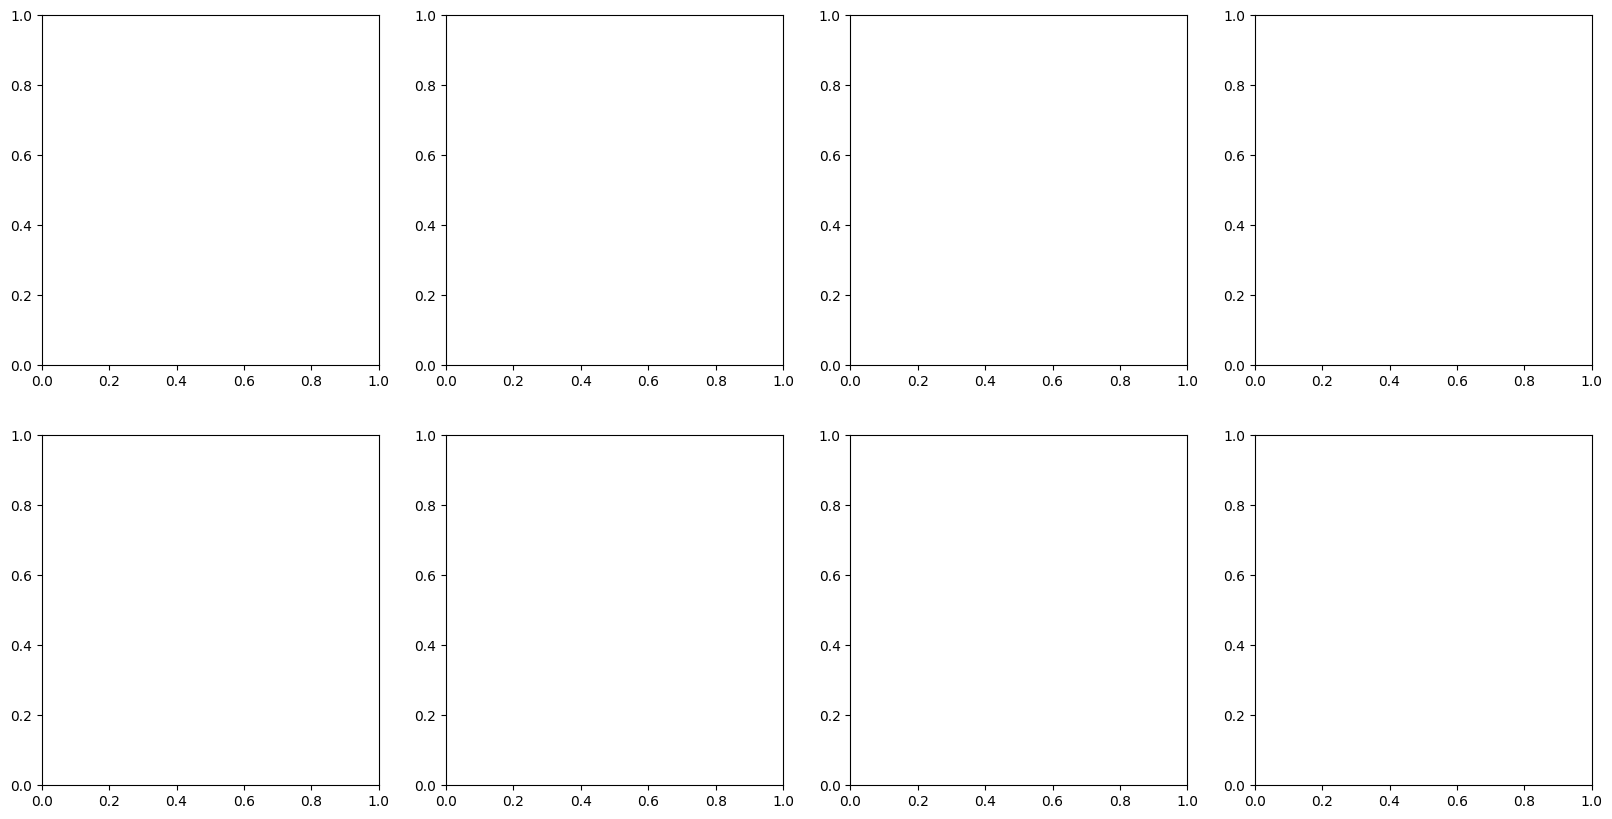

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX','DIS','AGE' ]
x = dataframe.loc[:, column_sels]
y = dataframe['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels) # Corrected Dataframe to DataFrame
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, l in enumerate(column_sels):
  sns.regplot(y=y, x=x[k], ax=axs[i])
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)